# Linear Regression with One Variable

Regressão linear é um modelo de aprendizado supervisionado que pode ser utilizado para predizer valor de imóveis e identificar padrões lineares quando existem uma ou mais variaveis de entrada.

Ele é capaz de predizer qual será o valor real a partir dos dados de entrada.

Notação:

"m": número de registros no banco de dados de treinamento
"x": variáveis de entrada (também conhecido como features [colunas])
"y": variáveis de saída (dado um valor de X, qual será o valor esperado em Y)
"(x, y)": exemplo simples de treinamento

## Linear Regression com 1 variável

Como o nome diz, recebe apenas uma variável de entrada.

\begin{align*}
h_\theta(x) = \theta_0 + \theta_1 x
\end{align*}

Função Hipotesis:
Y = β0 + β1 * X

O Objetivo é identificar os valores corretos de β0 e β1 de uma maneira que a linha esteja dentro dos dados de treinamento. Uma vez que estes parâmetros estiverem OK o valor de Y irá predizer com sucesso o valor de Y quando é dado um valor de X.

Para fazer isso utilizamos a função de custo (Cost Function) que é igual ao mostrado abaixo:

\begin{align*}
J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2
\end{align*}

In [2]:
# Import numpy for linear algebra and numerical computing functions, and matplotlib for plotting graphs
import numpy as np
from numpy import ones, zeros, newaxis, r_, c_, mat, dot
import matplotlib.pyplot as plt

# Enable matplotlib inline plotting for this notebook
%matplotlib inline

In [54]:
x = [1, 2, 3]
y = [1, 2, 3] 

result[0, 0] = 1.000000
result[1, 0] = 2.000000
result[2, 0] = 3.000000


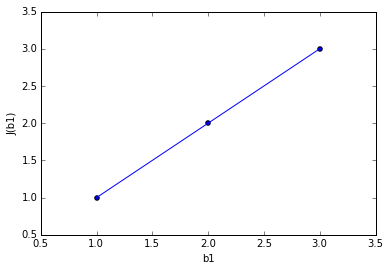

In [55]:
def hypothesis_function(x, m, b0, b1):
    result = zeros(shape=(m, 1))
    for i in range(m):
        result[i, 0] = b0 + b1*x[i]
        print 'result[%d, 0] = %f' % (i, result[i, 0])
    return result

theta_0 = 0
theta_1 = 1

y_hypothesis = hypothesis_function(x, 3, theta_0, theta_1)

plt.scatter(x, y, marker='o', c='b') # Marca os valores de dados normalmente
plt.plot(x, y_hypothesis)            # Traca a linha de hipotese do algoritmo com os valores
plt.xlabel('b1')
plt.ylabel('J(b1)')
plt.show()

In [58]:
# Implementação do Cost Function e um teste para verificar se está correto
def cost_function(x, y, m, theta_0, theta_1):
    result = float(1) / float(2*m)
    sqerror = float(0)
    for i in range(m):
        sqerror += ( (theta_0 + theta_1 * x[i]) - y[i] ) ** 2
    return result*sqerror

# Devera retornar 0 para esta matriz de treino
cost = cost_function(x, y, 3, 0, 1)

print 'cost: %f' % cost

cost: 0.000000


Como o objetivo deste algoritmo é achar o menor valor possível da função de custo. Vamos traçar um gráfico para facilmente encontrar este valor mínimo.

J(0) = 2.333333
J(1) = 0.000000
J(2) = 2.333333
J(3) = 9.333333
J(4) = 21.000000
J(-5) = 84.000000
J(-4) = 58.333333
J(-3) = 37.333333
J(-2) = 21.000000
J(-1) = 9.333333


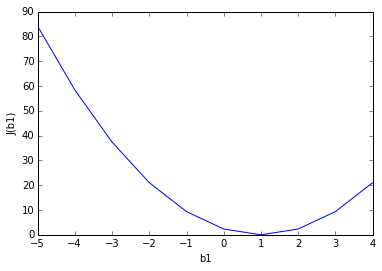

In [21]:
b1_values = range(-5, 5)
J_history = zeros(shape=(len(b1_values)))
for i in b1_values:
    print 'J(%d) = %f' % (b1_values[i], cost_function(x, y, 3, b1_values[i]))
    J_history[i] = cost_function(x, y, 3, b1_values[i])


plt.plot(b1_values, J_history)
plt.xlabel('b1')
plt.ylabel('J(b1)')
plt.show()

No exemplo acima o melhor valor para β1 é 1 (Veja a linha com o menor valor que é J(1) = 0.000000). Pois neste conjunto de dados é o menor valor de custo.

Porém deixamos fixo o valor de β0 para 0. Este é um exemplo simples, porém em exemplos mais complexos é importante descobrir o mais breve possível o valor de β0 e β1 ao mesmo tempo. Por isso utilizamos o Gradient Descendent.

## Gradient Descendent

Este algoritmo é utilizado para identificar automaticamente os valores de β1 e β2.

\begin{align*}
\text{repeat until convergence: } \lbrace & \newline 
\theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \newline
\theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}\right) \newline
\rbrace&
\end{align*}

O objetivo é adicionar o Gradient Descendent com o objetivo de minimizar o erro quadratico da função. Para calcular o erro
(Squared Error) basta usar a função abaixo:

In [22]:
def calc_squared_error(x, y, m, theta_0, theta_1):
    return sum([(theta_0 + theta_1 * x[i] - y[i])**2 for i in range(m)] )

In [28]:
def gradient_descendent(x, y, m, alpha, iterations):
    theta_0 = float(np.random.random(1))
    theta_1 = float(np.random.random(1))

    for iter in range(iterations):
        n_sum = sum([(theta_0 + theta_1 * x[i]) - y[i] for i in range(m)])
        tmp = theta_0 - alpha * ((float(1) / float(m)) * float(n_sum))
        theta_0 = tmp

        n_sum = sum([((theta_0 + theta_1 * x[i]) - y[i]) * x[i] for i in range(m)])
        tmp = theta_1 - alpha * ((float(1) / float(m)) * float(n_sum))
        theta_1 = tmp

        error = calc_squared_error(x, y, m, theta_0, theta_1)
        if abs(error) <= 0.01:
            print '[%d]: cost_theta_0(%f), cost_theta_1(%f) (error: %f)' % (iter, cost_function(x, y, m, theta_0), cost_function(x, y, m, theta_1), calc_squared_error(x, y, m, theta_0, theta_1))
            return theta_0, theta_1

[112]: cost_theta_0(1.676347), cost_theta_1(0.010259) (error: 0.009967)
result[0, 0] = 1.086086
result[1, 0] = 2.019778
result[2, 0] = 2.953469


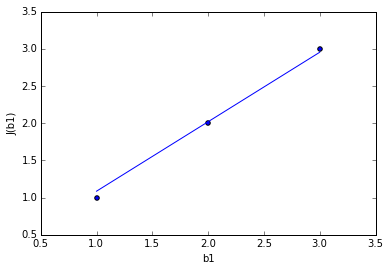

In [38]:
theta_0, theta_1 = gradient_descendent(x, y, 3, 0.1, 15000)

# Agora que temos os valores de theta_0 e theta_1 (que são os parametros que encontramos anteriormente) 
# Vamos utilizar nossa função de hipotese
y_hypothesis = hypothesis_function(x, 3, theta_0, theta_1)

plt.scatter(x, y, marker='o', c='b') # Marca os valores de dados normalmente
plt.plot(x, y_hypothesis)            # Traca a linha de hipotese do algoritmo com os valores
plt.xlabel('b1')
plt.ylabel('J(b1)')
plt.show()

## Exercicios

Consider the following training set of m=4 training examples:

   x   	   y   
   1   	   0.5   
   2   	   1   
   4   	   2   
   0   	   0   
   
Consider the linear regression model hθ(x)=θ0+θ1x. What are the values of θ0 and θ1 that you would expect to obtain upon running gradient descent on this model? (Linear regression will be able to fit this data perfectly.)

[29]: cost_theta_0(0.472576), cost_theta_1(0.001803) (error: 0.009571)
result[0, 0] = 0.549495
result[1, 0] = 1.023288
result[2, 0] = 1.970874
result[3, 0] = 0.075702


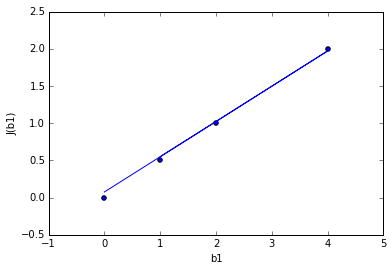

Resposta>> theta_0: 0.075702, theta_1: 0.473793


In [46]:
x = [1, 2, 4, 0]
y = [0.5, 1, 2, 0]
m = len(x)

theta_0, theta_1 = gradient_descendent(x, y, m, 0.1, 15000)

y_hypothesis = hypothesis_function(x, m, theta_0, theta_1)

plt.scatter(x, y, marker='o', c='b') # Marca os valores de dados normalmente
plt.plot(x, y_hypothesis)            # Traca a linha de hipotese do algoritmo com os valores
plt.xlabel('b1')
plt.ylabel('J(b1)')
plt.show()

print 'Resposta>> theta_0: %f, theta_1: %f' % (theta_0, theta_1)

Suppose we set θ0=0,θ1=1.5. What is hθ(2)?

In [51]:
y_hypothesis = hypothesis_function([6], 1, 0, 1)
print 'Resposta>> %f' % y_hypothesis

# ATENÇÃO: Estou considerando que o indice começa a partir do zero (verificar isso)

result[0, 0] = 11.000000
Resposta>> 11.000000



(V) If θ0 and θ1 are initialized at the global minimum, the one iteration will not change their values.
(V) If the first few iterations of gradient descent cause f(θ0,θ1) to increase rather than decrease, then the most likely cause is that we have set the learning rate α to too large a value.
(V)Setting the learning rate α to be very small is not harmful, and can only speed up the convergence of gradient descent.
(F) Even if the learning rate α is very large, every iteration of gradient descent will decrease the value of f(θ0,θ1).


In [ ]:
(F) NO We can perfectly predict the value of y even for new examples that we have not yet seen.

( ) NO This is not possible: By the definition of J(θ0,θ1), it is not possible for there to exist θ0 and θ1 so that J(θ0,θ1)=0	Correct	0.25	
    -- If all of our training examples lie perfectly on a line, then J(θ0,θ1)=0 is possible.



2- 
For this question, continue to assume that we are

using the training set given above. Recall our definition of the

cost function was J(θ0,θ1)=12m∑mi=1(hθ(x(i))−y(i))2.

What is J(0,1)? In the box below,

please enter your answer (use decimals instead of fractions if necessary, e.g., 1.5).

In [62]:
x = [3, 1, 0, 4]
y = [2, 2, 1, 3]

print cost_function(x, y, 3, 0, 1)

0.5


3- Suppose we set θ0=−2,θ1=0.5. What is hθ(6)?

In [63]:
print hypothesis_function([6], 1, -2, 0.5)

result[0, 0] = 1.000000
[[ 1.]]


Let f be some function so that f(θ0,θ1) outputs a number. For this problem, f is some arbitrary/unknown smooth function (not necessarily the cost function of linear regression, so f may have local optima). Suppose we use gradient descent to try to minimize f(θ0,θ1) as a function of θ0 and θ1. Which of the following statements are true? (Check all that apply.)

(V) If the learning rate is too small, then gradient descent may take a very long time to converge.
    ### Exp> Se a taxa de aprendizado é muito pequena, a função gradient descent torna cada passo algo muito pequeno a cada iteração, consequentemente irá levar mais tempo para convergir.
    
(F) Even if the learning rate α is very large, every iteration of gradient descent will decrease the value of f(θ0,θ1).
    ### Exp> Se a taxa de aprendizado for muito grande, ele irá dar uma série de grandes "tiros" e irá facilmente incrementar substancialmente o valor de f(θ0,θ1).
    
(F) If θ0 and θ1 are initialized so that θ0=θ1, then by symmetry (because we do simultaneous updates to the two parameters), after one iteration of gradient descent, we will still have θ0=θ1.
    ### Exp> Apesar de ser dito que as atualizações são feitas simultaneamente eles são feitos em momentos diferentes, então não existe nenhuma razão particular para isso ser verdade.
    
(V) If θ0 and θ1 are initialized at a local minimum, then one iteration will not change their values.
    ### Exp> No mínimo global, o gradient é zero, então ele não irá alterar os valores.
    

5- Suppose that for some linear regression problem (say, predicting housing prices as in the lecture), we have some training set, and for our training set we managed to find some θ0, θ1 such that J(θ0,θ1)=0. Which of the statements below must then be true? (Check all that apply.)

(F) For this to be true, we must have y(i)=0 for every value of i=1,2,…,m.

(V) Our training set can be fit perfectly by a straight line, i.e., all of our training examples lie perfectly on some straight line.

(F) For this to be true, we must have θ0=0 and θ1=0 so that hθ(x)=0
    
(F) Gradient descent is likely to get stuck at a local minimum and fail to find the global minimum.


# Links úteis

http://aimotion.blogspot.com.br/2011/10/machine-learning-with-python-linear.html
https://github.com/adamwalz/mlclass_ipython/blob/master/notebooks/Ex1%20-%20Linear%20Regression%20with%20One%20Variable.ipynb